# QUIZ 5 - Object Recognition: BoF vs ConvNetsTarefa

### Grupo: Luiz Gontijo, Marcos Vinicius, Matheus Pimenta

O objetivo deste Quiz é implementar e comparar duas maneiras de reconhecimento de objetos. 

In [193]:
import numpy as np
import pickle
import cv2 as cv
from matplotlib import pyplot as plt
import scipy.misc as smp

In [194]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [195]:
batch1 = unpickle("./cifar-10-python/cifar-10-batches-py/data_batch_1")
# for key in batch1:
#     print(key, '->', batch1[key])



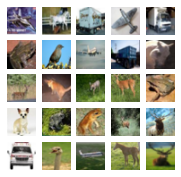

In [196]:
X = batch1[b"data"] 
Y = batch1[b'labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])


### Bag of Features

1. Dataset aleatório
2. SIFT pra cada uma das imagens
3. Comparar descritores do SIFT e separar em grupos (clusters)
4. Criar um representante para cada grupo (média do grupo)
5. Classificar todas as imagens (data e label)
    data = [[1,2,3],[1,3,5],...] | label = [0,1,2,...]
6. Passar pros modelos de aprendizado


⚫ It is composed of 4 steps
    1. Feature Extraction
    2. Visual Dictionary Creation
    3. Vector Quantization
    4. Image Representation

In [197]:
def get_SIFT_desc(img):
    sift = cv.SIFT_create()
    k, d = sift.detectAndCompute(img, None)
    return k, d

In [198]:

def get_random_img(dataset):
    X = dataset[b"data"] 
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    i = np.random.choice(range(len(X)))
    return X[i:i+1][0]

In [60]:
def get_descriptors_n_imgs(dataset, n):
    descs = []
    for i in range(n):
        img = get_random_img(dataset)
        _, desc_array = get_SIFT_desc(img)

        if desc_array is not None:
            for elem in desc_array:
                descs.append(elem)

    descs = np.array(descs)
    return descs


def create_clusters(descs, k, attempts):
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _,_,center = cv.kmeans(descs,k,None,criteria,attempts,cv.KMEANS_RANDOM_CENTERS)
    return center

In [61]:
# TESTES
# img = get_random_img(batch1)
# k, d = get_SIFT_desc(img)
# copy = img.copy()
# copy = cv.drawKeypoints(img,k,copy,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# plt.imshow(copy)
# plt.show()
descs = get_descriptors_n_imgs(batch1, 100)
centers = create_clusters(descs, 10, 10)
print(centers)

[[11.037686  10.174409  13.465382  ... 18.707273  14.230499  12.957055 ]
 [27.0081    23.843887  17.502945  ... 25.224596  17.52209   14.259941 ]
 [15.72935   17.16608   18.071178  ... 16.161688  15.253955  15.8198595]
 ...
 [12.2498    25.280321  42.543777  ... 12.363855  16.281124  18.740562 ]
 [10.704835   6.8006787  8.224767  ... 11.50721    8.476675   9.813401 ]
 [32.199306  32.12247   23.053726  ...  4.472559   3.7302136  8.1253605]]


In [86]:
def generate_hist(img, vocab):
    k, d = get_SIFT_desc(img)
    # n1 = d[0]
    # n2 = vocab[0]
    # diff = sum( np.sqrt ([x**2 for x in n1] - [x**2 for x in n2]))
    histograma = []
    for word in vocab:
        aux = 0
        for elem in d:
            foo = [x**2 for x in elem]
            bar = [x**2 for x in word]
            print(np.sqrt ( [np.abs(x1 - x2) for (x1, x2) in zip(foo, bar)]))
            luiz = sum ( np.sqrt ( [np.abs(x1 - x2) for (x1, x2) in zip(foo, bar)]))
            print(luiz)
            if( luiz <= 4200.0 ): #32.8125
                aux = aux + 1
                print(elem)
                print("@@")
                print(vocab)
        
        histograma.append(aux)

                
    print(histograma)

generate_hist(get_random_img(batch1), centers)

[ 10.99229366   4.74537635  42.9381357   22.37888994   9.2794117
   9.51550195 145.38751045  54.28431475  30.40802861  45.59185621
  18.93532667  13.74482307  12.38212109  15.8045578  144.11819753
  83.01026894  42.8348987   15.77957803   9.15863323   9.66432953
  15.24978065  28.66257668 137.39790789  35.82700935  13.3990305
   9.40140247   7.4285717   11.83172703  27.60035133  45.70902634
 109.60229383  94.89941765  20.1972176   17.59078288  71.68793074
  73.64923856 109.01850552  85.56678936  16.6306299   17.2837816
 132.65702497  99.36928192  28.53991787  25.71238147  23.77052373
  22.25080874  20.39517189  33.42468308  58.52374248  45.53980048
  22.30586496   8.88678044  12.54250622  20.92813301  16.68823748
  64.2539152   26.55127144   9.47498256  33.89247653  31.19624761
  59.33917618  65.7861557   47.62938073  29.1075828   13.64025717
  15.75547791  11.54601192   9.8256678   54.61076465 144.831717
  15.03569651  20.76706136 137.31137632  36.77648727  10.0334947
  13.21384716  2